Our Sequence for autism is:
ACTCGGCTCGGTCCTGAGGAGAAGGACTCAGCCGCGGCTGCGGGACCCGGGCACCGGGAGGCGGTGGCGGCGGCGGCGGCGGCAGCAGCGGCGACAGCAGAGGAGGAAGAGGAGGAAGAAGGAAAGAAAAAGAAGAACCAGGAGGAGTCCTCAACAACGACAGCGGGGACTGCGGGACCAGGGTAAAGCGGCGACGGCGGCGACGGCCCAGCAACCGTGAGGAGAAACAAAAGCCTTCTAAATTATAGTTTAAAAAAAAATTCTGGGGGAAAAGAGAGAGAAAGCCGAGGGGGGAGGCCCTTCTCCTTTAAAATAACTACGGTAGTGGGTTTTTCCTTTTTTTCCTCTTTTTTCCCTCTCTGCGGAGAATCGAACTGAGGGAACTGAACAAACCGCCCCTGGGTCCCATGAGGGAAAAAAACCCCGGAGCCGCAGAGAGGGGAAGAGGCAGAAACCGCAGGACCTTCCAGGTCGCCCCCTCGGTCCCCGCACCCCCAGGCCGCCCGCTCACCCTCGTCGAGTCTCGCTAATCCCTCCTGATCGCGACCCCCGCAAGAGGGAGAAACGGGTGTTTCCAACCCCTTTCATGGGGGAGAGGAAGCCGCGGGGAGCCCAGGAACAGCGACCGCAGCAAGATCTGCACCCGGAGCCTCAGGAACAGCCCCAGAGGCCAAAACTGCACCCTGCGAAAGAGCAGAAAACAGGACCAGGAACAGCAGAAACCTCCCTGCAATCATCTTTCCATTAGTCAATGCTGATTTCCTCTCCCGAAACCAGGAATTCACTTCCCACCCCAGATAACCTAATATAATCTATATATATAAATATATAATATATAATGTTCTTAAATTATTCCTGATTTTTTTTTAACCAAGCTGCCAAGAAAAGAACGTATTCCCCTCTTAGTCCTATTCTAATTTTTATGTGAGTGAATCTAAACTGCTGAGGAAAACCATATGTGATTGTTAAATT

Text(0.5, 1.0, 'Nucleotide Frequency')

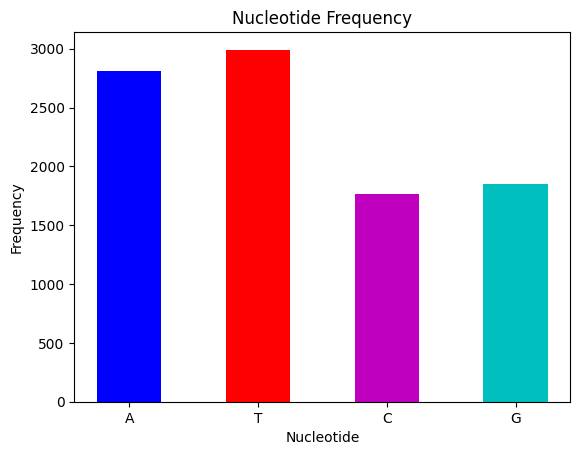

In [35]:

from Bio import Entrez, SeqIO

Entrez.email = "your_email@example.com"  # Replace with your email

# Fetch the mRNA sequence for CPEB4
handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="NM_030627.4")
recs = list(SeqIO.parse(handle, "genbank"))
handle.close()

# Check if any records were retrieved
if recs:
    autism_dna = recs[0].seq
    print(f"Our Sequence for autism is:\n{autism_dna}")
else:
    print("No records found. Check the accession number or database parameters.")




print("-------------------------------------------------------------------")
print("----------------- WELCOME TO AUTISM PROTEIN ANALYSIS---------------")
print("-------------------------------------------------------------------")


print("Here is the analysis of the Autism DNA Data:")
# Tells us the length of our DNA Sequence ------------------------------------
print(f'- Total Nucleotides: {len(autism_dna)}')

#Molecular weight ------------------------------------------------------
from Bio.SeqUtils import molecular_weight
print(f"- Our Molecular Weight is:", molecular_weight(autism_dna) )

#GC content - higher GC content implies more stable molecule ---------------
def gc_content (seq):
    return round ((seq.count("G") + seq.count("C")) / len(seq) * 100, 6)
print(f"- GC Content:", gc_content(autism_dna))
percent_gc = ((gc_content(autism_dna) / len(autism_dna)) * 100)
print(f"- Percent GC: {round(percent_gc,2)} %")
if percent_gc > 0.60:
  print("- Based on GC % this molecule is very stable")
elif percent_gc > 0.40:
  print("- Based on GC % this molecule is moderate stable")
else:
  print("- Based on GC % this molecule is not  stable")

# Transcription DNA -> RNA ----------------------------------
def transcription(seq):
  # Replaces Thymine with Uracil in DNA
  return seq.replace("T", "U")
print("- DNA/RNA Transcription: " + transcription(autism_dna)) # Turned DNA -> RNA


# Makes a chart graphing all the Nucleotides in a table: ------------------------
print("- Nucleotide Frequency Data Results:")
count_nucleotides = {
    'A': autism_dna.count('A'),
    'T': autism_dna.count('T'),
    'C': autism_dna.count('C'),
    'G': autism_dna.count('G')
}
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

# Common Amino Acids found in Autism:

/usr/local/lib/python3.11/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Autism's genome has 2953 amino acids


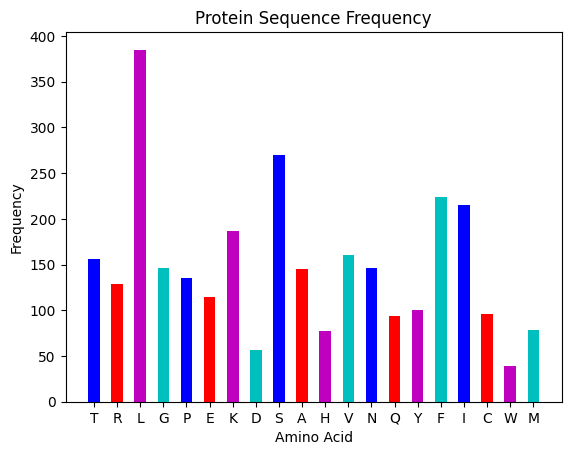

In [37]:

#Most Common Amino Acids ----------------------------------------------------------
autism_dna = autism_dna.translate() # Translates our Autism RNA -> Proteins
from collections import Counter
common_amino = Counter(autism_dna)
common_amino.most_common(10) #Gets the Top 10 most common amino acids
del common_amino['*']
width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')
print(f"- Autism's genome has {sum(common_amino.values())} amino acids")
# According to our Analysis we got the highest amount amino acids in Leucine and Serine.



#Counting Kmer: PxxP, with every two amino acids = x, there is P=Per